In [4]:
# Created: Dec. 17. 2018
# Use this notebook to restore saved tensorflow models.

In [1]:
import os
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
sys.path.append("../")

In [3]:
import hps_configs.mac_config as config
import core.tools.rnn_prepare as rnn_prepare
import constants

In [4]:
data_param = config.dp_config

In [5]:
DIR = "/Users/tianyudu/Desktop/sample_model/saved_models/"
META = "num_neurons=(32, 64)-learning_rate=0.1.meta"
FILE_DIR = constants.DATA_DIR["a"]

In [6]:
tf.reset_default_graph()

In [7]:
!cd /Users/tianyudu/Downloads/sample_model/saved_models/
!pwd

/Users/tianyudu/Documents/Academics/EconForecasting/AnnEconForecast/notebooks


In [8]:
prepared_df = rnn_prepare.prepare_dataset(
    file_dir=FILE_DIR,
    periods=data_param["PERIODS"],
    order=data_param["ORDER"],
    remove=None,
    verbose=False
)
(X_train, X_val, X_test,
 y_train, y_val, y_test) = rnn_prepare.generate_splited_dataset(
    raw=prepared_df,
    train_ratio=data_param["TRAIN_RATIO"],
    val_ratio=data_param["VAL_RATIO"],
    lags=data_param["LAGS"]
)
data_collection = {
    "X_train": X_train,
    "X_val": X_val,
    "X_test": X_test,
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test
}

Dataset loaded.    
	Index type: datetime64[ns]    
	Data type: float64
StandardScaler applied, scaling based on the first 679 observations.
Total 836 observations generated.
Note: shape format: (num_obs, time_steps, num_inputs/outputs)
X shape = (836, 12, 1), y shape = (836, 1, 1)
Training and testing set generated,        
X_train shape: (668, 12, 1)        
y_train shape: (668, 1)        
X_test shape: (84, 12, 1)        
y_test shape: (84, 1)        
X_validation shape: (84, 12, 1)        
y_validation shape: (84, 1)


In [10]:
globals().update(data_collection)
verbose = False
# train_param = {
#     "epochs": 150,
#     "num_time_steps": 12,
#     "num_inputs": 1,
#     "num_outputs": 1,
#     "num_neurons": (32, 64),
#     "learning_rate": 0.1,
#     "clip_grad": None,
#     "report_periods": 10,
#     "tensorboard_dir": MAIN_DIRECTORY + "/tensorboard/",
#     "model_path": MAIN_DIRECTORY + "/saved_models/",
#     "fig_path": MAIN_DIRECTORY + "/model_figs/"
# }
# parameters = train_param

In [11]:
# if verbose:
#     print("Resetting Tensorflow defalut graph...")
# tf.reset_default_graph()

# globals().update(parameters)
# globals().update(data_collection)

# predictions = dict()

# with tf.name_scope("DATA_FEED"):
#     X = tf.placeholder(
#         tf.float32,
#         [None, num_time_steps, num_inputs],
#         name="Feature_X"
#     )
#     y = tf.placeholder(
#         tf.float32,
#         [None, num_outputs],
#         name="Label_y"
#     )

# # with tf.name_scope("RECURRENT_UNITS"):
# multi_cell = tf.nn.rnn_cell.MultiRNNCell(
#     [tf.nn.rnn_cell.LSTMCell(
#         num_units=x,
#         name=f"LSTM_Cell_{i}"
#     )
#         for i, x in enumerate(num_neurons)]
# )

# rnn_outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
# stacked_output = tf.reshape(
#     rnn_outputs, [-1, num_time_steps * num_neurons[-1]])

# with tf.name_scope("OUTPUT_LAYER"):
#     W = tf.Variable(tf.random_normal(
#         [num_time_steps * num_neurons[-1], 1]), dtype=tf.float32, name="Weight")
#     b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Bias")

#     pred = tf.add(tf.matmul(stacked_output, W), b, name="Prediction")

#     tf.summary.histogram("weights", W)
#     tf.summary.histogram("biases", b)
#     tf.summary.histogram("predictions", pred)

# # pred = tf.layers.dense(stacked_output, 1)

# with tf.name_scope("METRICS"):
#     loss = tf.reduce_mean(tf.square(y - pred), name="mse")

#     mape = tf.reduce_mean(tf.abs(tf.divide(y - pred, y)))
#     tf.summary.scalar("mean_squared_error", loss)
#     tf.summary.scalar("mean_absolute_percentage_error", mape)

# with tf.name_scope("OPTIMIZER"):
#     optimizer = tf.train.AdamOptimizer(
#         learning_rate=learning_rate, name="Adam_optimizer")

#     if clip_grad is None:
#         if verbose:
#             print("Note: no gradient clipping is applied.\
#             \nIf possible gradient exploding detected (e.g. nan loss), try use clip_grad.")
#         train = optimizer.minimize(loss)
#     else:
#         if verbose:
#             print("Applying gradient clipping...")
#             print(f"\tClip by values: {clip_grad}")
#         gvs = optimizer.compute_gradients(loss)
#         capped_gvs = [
#             (tf.clip_by_value(grad, - clip_grad, clip_grad), var)
#             for grad, var in gvs
#         ]
#         train = optimizer.apply_gradients(capped_gvs)

In [23]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph(DIR + META)
    new_saver.restore(sess, tf.train.latest_checkpoint(DIR))
#     print(sess.run("DATA_FEED/Feature_X"))
    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("DATA_FEED/Feature_X:0")
    pred = graph.get_tensor_by_name("OUTPUT_LAYER/Prediction:0")
#     print(sess.run("OUTPUT_LAYER/Prediction"))
    def make_pred(feed_X):
        return pred.eval(feed_dict={X: feed_X})
    p_train = make_pred(X_train)
    p_val = make_pred(X_val)
    p_test = make_pred(X_test)

INFO:tensorflow:Restoring parameters from /Users/tianyudu/Desktop/sample_model/saved_models/num_neurons=(32, 64)-learning_rate=0.1


In [168]:
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# imported_meta = tf.train.import_meta_graph(DIR + META)
# imported_meta.restore(sess, tf.train.latest_checkpoint(DIR))

In [169]:
trainable_var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

In [170]:
tf.get_collection("Prediction")

[]

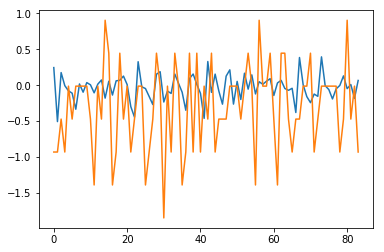

In [24]:
plt.close()
plt.plot(p_test)
plt.plot(y_test)

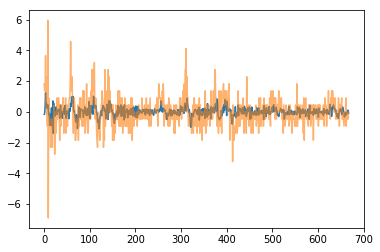

In [26]:
plt.close()
plt.plot(p_train)
plt.plot(y_train, alpha=0.6)